In [2]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy import stats
from sklearn.utils import resample
import statistics
import copy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import nltk
from bs4 import BeautifulSoup
import re
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from html.parser import HTMLParser
from gensim.parsing.preprocessing import remove_stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud

Part1 Data cleaning

In [38]:
sentiment_data = pd.read_csv("sentiment_analysis.csv")

In [39]:
election_data = pd.read_csv("Canadian_elections_2021.csv")

In [ ]:
# we need to download the following 3 packages in order to use the stopwords from nltk

In [40]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\syy19\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\syy19\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))# get stopwords from nltk
new_stopwords = ['rt','i\'m','can\'t']# add customized stopwords
stop_words = stop_words.union(new_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\syy19\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'm",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'o

In [44]:
html = HTMLParser() # the parser can help us get rid of the html tags

In [45]:
def stemming(text):#trace words to its root form to prevent having too much features in part3
    words = nltk.tokenize.word_tokenize(text)
    wn = nltk.WordNetLemmatizer()
    words = [wn.lemmatize(word) for word in words]
    return (" ").join(words)

In [46]:
def remove_sw(text): #method to remove stopwords using nltk
    word_tokens = word_tokenize(text) 
    filtered_text = [w for w in word_tokens if not w.lower() in stop_words] 
    return (" ").join(filtered_text)

In [47]:
def clean_text(text):
    
    text = BeautifulSoup(html.unescape(text), "lxml").text#remove html tags and attributes and convert the text to ascii/unicode
    text= re.sub(r'http\S+', '', text)# remove URLs   
    text = text.lower()
    #text = remove_stopwords(text) #remove stopwords using gensim library
    text = remove_sw(text)#remove stop words using nltk
     
    #text = re.sub(r"\s+", " ", text) #replace [ \t\n\r\f\v] with " "
    text = re.sub(r'\w*\d\w*', '', text)#remove all words contain numbers.Otherwise we get too many features in part 3
    text = re.sub(r'\b\w{1,2}\b', '', text) # remove words that are 2 or less in length(words not useful)
    text = stemming(text) #stemming words using nltk
    text = text.strip() # strip the white space from beginning and the end of the string
    return text


In [48]:
#apply data cleaning to every tweet
sentiment_data['cleaned_text']=sentiment_data['text'].apply(lambda st : clean_text(st))

In [ ]:
#we do not keep the original tweets
sentiment_data.drop(['text'],axis = 1,inplace = True)

In [51]:
#save the df to prevent doing the same procedure above every time
sentiment_data.to_csv('sentiment.csv',index = False)

In [52]:
#apply data cleaning to every tweet
election_data['cleaned_text']=election_data['text'].apply(lambda st : clean_text(st))

In [ ]:
#we do not keep the original tweets
election_data.drop(['text'],axis = 1,inplace = True)

In [53]:
#save the df to prevent doing the same procedure above every time
election_data.to_csv('election.csv',index = False)

Part 2 Exploratory analysis

In [54]:
#read the cleanned tweets from part1
sentiment_data = pd.read_csv("sentiment.csv")

In [55]:
election_data = pd.read_csv("election.csv")

In [56]:
#election_data

In [57]:
#sentiment_data

,ID,label,cleaned_text
0,7.680980e+17,1,josh jenkins looking forward tab breeder crown...
1,7.680980e+17,1,@ mianusmanjaved : congratulation pakistan bec...
2,7.680980e+17,1,"@ pepalerts : september , @ yesmag taking main..."
3,7.680980e+17,1,"@ david_gaibis : newly painted wall , thanks m..."
4,7.680980e+17,1,@ cedricfeschotte : excited announce : july fe...
...,...,...,...
550386,8.046170e+17,0,@ goddesses_o ' stop watching ... . ? ? ?
550387,8.046180e+17,0,poor old tom odell ' look like would know wron...
550388,8.046180e+17,1,# antsmasher smashed ant awesome game ! ! ! hj...
550389,8.046180e+17,1,@ lizhudston @ kymwyllie @ evasmiless @ meanbo...


In [58]:
election_data['political_party'] = np.nan

In [59]:
#People use the hashtag symbol (#) before a relevant keyword or phrase in their Tweet to categorize those Tweets 
#and help them show more easily in Twitter search so we should first classify tweets using tags.
#If there are no hash tags in a tweet, we extract substrings that are relevant to a particular party(eg.liberal).
#In case a tweet is about several parties, we classify the tweet to be one of the parties'.

In [60]:
def get_political_party():
    for i in range(0,election_data.shape[0]):
        text =  election_data.loc[i,'cleaned_text']  
        if re.search('#',text): #if we find any hashtag in a tweet
            if 'voteppc' in text or 'ppc' in text:
                election_data.loc[i,'political_party'] = 'ppc'
            elif 'voteliberal' in text:
                election_data.loc[i,'political_party'] = 'liberal'
            elif 'nevervoteconservative' in text or 'nevervotecpc' in text or 'voteconservative' in text:
                election_data.loc[i,'political_party'] = 'conservative'
            elif 'votendp' in text or 'ndp' in text:
                election_data.loc[i,'political_party'] = 'ndp'

        #if a tweet does not have a hashtag, we will extract key words to assign this tweet to a party   
        if election_data.loc[i,'political_party'] not in ('ndp' , 'ppc' , 'liberal' , 'conservative'):

            if 'new democratic party' in text or 'ndp'  in text or 'jagmeet' in text or 'singh' in text :
                election_data.loc[i,'political_party'] = 'ndp'
            elif 'party of canada' in text or 'ppc' in text or 'max' in text or 'bernier' in text :
                election_data.loc[i,'political_party'] = 'ppc'
            elif 'liberal' in text or 'trudeau'in text or 'justin'in text:
                election_data.loc[i,'political_party'] = 'liberal'
            elif 'conservative' in text or 'erin' in text or 'toole' in text or 'cpc' in text:
                election_data.loc[i,'political_party'] = 'conservative'
            else: # if we cannot find any related key word, this tweet is not assigned to any party
                election_data.loc[i,'political_party'] = 'other'

        

In [61]:
get_political_party()#call the method above

In [62]:
tweet_count = []# a list for recording the related number of tweets for each party

In [63]:
tweet_count.append(list(election_data['political_party']).count('liberal'))
tweet_count.append(list(election_data['political_party']).count('conservative'))
tweet_count.append(list(election_data['political_party']).count('ppc'))
tweet_count.append(list(election_data['political_party']).count('ndp'))
tweet_count.append(list(election_data['political_party']).count('other'))

In [64]:
tweet_count # number of tweets associated with different parties

[395, 205, 104, 73, 225]

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'political party'),
 Text(0.5, 1.0, 'political affiliations of the tweets')]

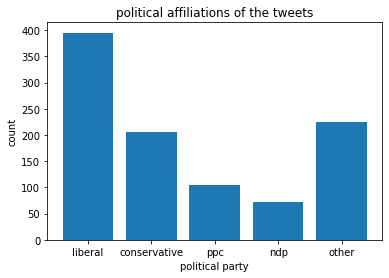

In [65]:
# We can see that tweets about the Liberal Party is the most. 
# If we rank the political affiliations of the tweets for the four parties, we have 'liberal'>'conservative'>'ppc' > 'ndp',
# ranking from the highest to the lowest.
x = np.arange(5)
plt.bar(['liberal','conservative','ppc','ndp','other'],tweet_count)
plt.gca().set(ylabel='count', xlabel = 'political party', title = 'political affiliations of the tweets')

In [67]:
election_data

,sentiment,negative_reason,cleaned_text,political_party
0,negative,calling election early,"canadian election power grab trudeau , yes -- ...",liberal
1,negative,covid,hope trudeau loses canadian election tomorrow ...,liberal
2,positive,NaN,"dear canadian , election test progressive . wh...",other
3,negative,calling election early,canadian friend : never forget trudeau year ma...,liberal
4,positive,NaN,sorry @ thejagmeetsingh voted # ndp life elect...,ppc
...,...,...,...,...
997,negative,others,absolutely horrible canada . forthcoming elect...,other
998,negative,gun control,@ davidakin trudeau imposes gun control policy...,liberal
999,negative,others,canada 🇨🇦 election stolen thug . uneducated go...,other
1000,negative,tell lies,"'toole amends platform gun control , question ...",conservative


In [68]:
map_dict = {'positive':1, 'negative':0} # we want to map the sentiment string label to the corresponding binary label     

In [69]:
election_data['label']=election_data['sentiment'].map(map_dict)# get the binary label using the above method

In [70]:
election_data

,sentiment,negative_reason,cleaned_text,political_party,label
0,negative,calling election early,"canadian election power grab trudeau , yes -- ...",liberal,0
1,negative,covid,hope trudeau loses canadian election tomorrow ...,liberal,0
2,positive,NaN,"dear canadian , election test progressive . wh...",other,1
3,negative,calling election early,canadian friend : never forget trudeau year ma...,liberal,0
4,positive,NaN,sorry @ thejagmeetsingh voted # ndp life elect...,ppc,1
...,...,...,...,...,...
997,negative,others,absolutely horrible canada . forthcoming elect...,other,0
998,negative,gun control,@ davidakin trudeau imposes gun control policy...,liberal,0
999,negative,others,canada 🇨🇦 election stolen thug . uneducated go...,other,0
1000,negative,tell lies,"'toole amends platform gun control , question ...",conservative,0


In [71]:
election_data = election_data.astype({"label": int, "cleaned_text": str})

In [74]:
election_data.to_csv('election.csv',index = False) # save the election data with the binary sentiment label

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'label'),
 Text(0.5, 1.0, 'distribution of sentiment label')]

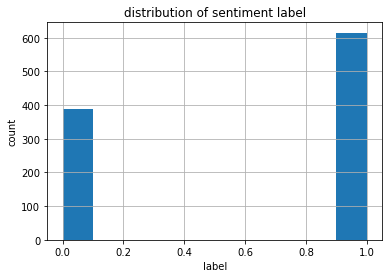

In [75]:
# we have more positive tweets than negative tweets in 2021 election tweets
election_data.hist('label')
plt.gca().set(ylabel='count', xlabel = 'label', title = 'distribution of sentiment label')

In [76]:
election_data['length'] = election_data['cleaned_text'].apply(lambda x :len(x))# compute length for each cleanned tweet
election_data.head()

,sentiment,negative_reason,cleaned_text,political_party,label,length
0,negative,calling election early,"canadian election power grab trudeau , yes -- ...",liberal,0,211
1,negative,covid,hope trudeau loses canadian election tomorrow ...,liberal,0,223
2,positive,NaN,"dear canadian , election test progressive . wh...",other,1,209
3,negative,calling election early,canadian friend : never forget trudeau year ma...,liberal,0,202
4,positive,NaN,sorry @ thejagmeetsingh voted # ndp life elect...,ppc,1,221


In [77]:
#list(sentiment_data['cleaned_text'].isnull()).count(False)

550340

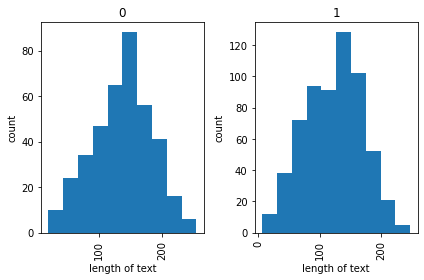

In [78]:
#The distributions of length for both positive and negative tweets are very similar.
#They all have a normal distribution like shape. The mean/mode of the tweets' length are around 150 
#The bar in the middle for the positive tweets are heavier than for negative tweets(0:negative, 1:positive)
g = election_data.hist('length',by='label')
for ax in g.flatten():
    ax.set_xlabel("length of text")
    ax.set_ylabel("count")
plt.tight_layout()

In [79]:
sentiment_data

,ID,label,cleaned_text
0,7.680980e+17,1,josh jenkins looking forward tab breeder crown...
1,7.680980e+17,1,@ mianusmanjaved : congratulation pakistan bec...
2,7.680980e+17,1,"@ pepalerts : september , @ yesmag taking main..."
3,7.680980e+17,1,"@ david_gaibis : newly painted wall , thanks m..."
4,7.680980e+17,1,@ cedricfeschotte : excited announce : july fe...
...,...,...,...
550386,8.046170e+17,0,@ goddesses_o ' stop watching ... . ? ? ?
550387,8.046180e+17,0,poor old tom odell ' look like would know wron...
550388,8.046180e+17,1,# antsmasher smashed ant awesome game ! ! ! hj...
550389,8.046180e+17,1,@ lizhudston @ kymwyllie @ evasmiless @ meanbo...


[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'label'),
 Text(0.5, 1.0, 'distribution of sentiment label')]

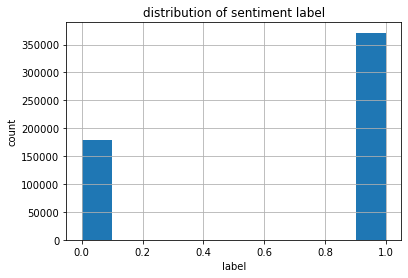

In [80]:
# we have more positive tweets than negative tweets in generic tweets
sentiment_data.hist('label')
plt.gca().set(ylabel='count', xlabel = 'label', title = 'distribution of sentiment label')

In [82]:
sentiment_data = sentiment_data.astype({"cleaned_text": str})

In [83]:
sentiment_data['length'] = sentiment_data['cleaned_text'].apply(lambda x :len(x))# get length of each generic tweet

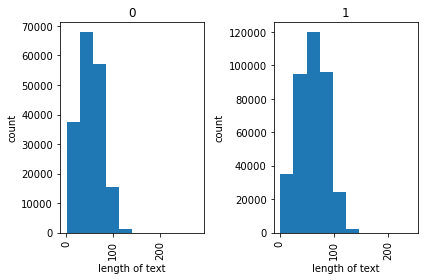

In [84]:
#The distributions of length for both positive and negative tweets are similar and they all have a normal distributon like shape.
#The mean/mode of the length of negative tweets are similar to that of positive tweets.
#The bar in the middle for the positive tweets are heavier than for negative tweets(0:negative, 1:positive)
#They all have small tails.
g = sentiment_data.hist('length',by='label')
for ax in g.flatten():
    ax.set_xlabel("length of text")
    ax.set_ylabel("count")
plt.tight_layout()

Part 3 Model preparation

In [88]:
sentiment_data = pd.read_csv("sentiment.csv") #read from saved data

In [90]:
election_data = pd.read_csv("election.csv")

In [91]:
sentiment_data

,ID,label,cleaned_text
0,7.680980e+17,1,josh jenkins looking forward tab breeder crown...
1,7.680980e+17,1,@ mianusmanjaved : congratulation pakistan bec...
2,7.680980e+17,1,"@ pepalerts : september , @ yesmag taking main..."
3,7.680980e+17,1,"@ david_gaibis : newly painted wall , thanks m..."
4,7.680980e+17,1,@ cedricfeschotte : excited announce : july fe...
...,...,...,...
550386,8.046170e+17,0,@ goddesses_o ' stop watching ... . ? ? ?
550387,8.046180e+17,0,poor old tom odell ' look like would know wron...
550388,8.046180e+17,1,# antsmasher smashed ant awesome game ! ! ! hj...
550389,8.046180e+17,1,@ lizhudston @ kymwyllie @ evasmiless @ meanbo...


In [92]:
election_data

,sentiment,negative_reason,cleaned_text,political_party,label
0,negative,calling election early,"canadian election power grab trudeau , yes -- ...",liberal,0
1,negative,covid,hope trudeau loses canadian election tomorrow ...,liberal,0
2,positive,NaN,"dear canadian , election test progressive . wh...",other,1
3,negative,calling election early,canadian friend : never forget trudeau year ma...,liberal,0
4,positive,NaN,sorry @ thejagmeetsingh voted # ndp life elect...,ppc,1
...,...,...,...,...,...
997,negative,others,absolutely horrible canada . forthcoming elect...,other,0
998,negative,gun control,@ davidakin trudeau imposes gun control policy...,liberal,0
999,negative,others,canada 🇨🇦 election stolen thug . uneducated go...,other,0
1000,negative,tell lies,"'toole amends platform gun control , question ...",conservative,0


Bag of Words

In [93]:
X = sentiment_data['cleaned_text']
y = sentiment_data['label']

In [94]:
#split generic tweets into train(70%) and test(30%) data
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X,y,test_size=0.3)

In [96]:
bow_vectorizer = CountVectorizer()# get bag of words using a CountVectorizer

In [97]:
#get the bow training data
x_train_bow = bow_vectorizer.fit_transform(X_train_bow.values.astype('str')) 
#x_train = pd.DataFrame(x_train.toarray(),columns=vectorizer.get_feature_names())
#x_train.head()

In [98]:
x_train_bow

<385273x239965 sparse matrix of type '<class 'numpy.int64'>'
	with 2641044 stored elements in Compressed Sparse Row format>

In [99]:
#bow_vectorizer.get_feature_names()

In [100]:
#get the bow test data
x_test_bow = bow_vectorizer.transform(X_test_bow.values.astype('str')) 

In [101]:
x_test_bow

<165118x239965 sparse matrix of type '<class 'numpy.int64'>'
	with 1059460 stored elements in Compressed Sparse Row format>

In [102]:
#bow_vectorizer.get_feature_names()

TF-IDF

In [103]:
#train test split
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X,y,test_size=0.3)

In [104]:
tf_vectorizer = TfidfVectorizer(use_idf=True,  
                        smooth_idf=True)
 
#get tfidf training data 
x_train_tf = tf_vectorizer.fit_transform(X_train_tf.values.astype('str'))
#get tfidf test data 
x_test_tf = tf_vectorizer.transform(X_test_tf.values.astype('str')) 
#tf_idf_dataframe_smooth=pd.DataFrame(tf_idf_data_smooth.toarray(),columns=tf_idf_vec_smooth.get_feature_names())

In [105]:
x_train_tf

<385273x239793 sparse matrix of type '<class 'numpy.float64'>'
	with 2641923 stored elements in Compressed Sparse Row format>

In [106]:
x_test_tf

<165118x239793 sparse matrix of type '<class 'numpy.float64'>'
	with 1058611 stored elements in Compressed Sparse Row format>

Part 4 model implementation and tuning

part a)

section a

In [108]:
pred_acc = []# list to record the 14 accuracies(7 algorithms for tfidf and bow)

In [109]:
#logistic regression(bag of words)
lr = LogisticRegression(random_state=0).fit(x_train_bow, y_train_bow)
prediction = lr.predict(x_test_bow)
ACC = accuracy_score(y_test_bow, prediction)
pred_acc.append(ACC)
ACC

0.972050291306823

In [110]:
#SVM(bag of words)
lsvc = LinearSVC(random_state=0,class_weight = 'balanced')
lsvc.fit(x_train_bow, y_train_bow)
prediction = lsvc.predict(x_test_bow)
ACC = accuracy_score(y_test_bow, prediction)
pred_acc.append(ACC)
ACC

0.9696641189936893

In [111]:
#decision trees(bag of words)
dt = DecisionTreeClassifier(random_state=0,max_depth=80)
dt.fit(x_train_bow, y_train_bow)
prediction = dt.predict(x_test_bow)
ACC = accuracy_score(y_test_bow, prediction)
pred_acc.append(ACC)
ACC

0.916023692147434

In [112]:
#Random Forest(bag of words) 
rf = RandomForestClassifier(max_depth=100, random_state=0, n_estimators = 5,n_jobs = -1)
rf.fit(x_train_bow, y_train_bow)
prediction = rf.predict(x_test_bow)
ACC = accuracy_score(y_test_bow, prediction)
pred_acc.append(ACC)
ACC

0.7514444215651837

In [113]:
#XGBoost(bag of words)
xgbc=xgb.XGBClassifier(random_state=1,learning_rate=0.01,n_jobs = -1, booster = 'gblinear')
xgbc.fit(x_train_bow, y_train_bow)
prediction = xgbc.predict(x_test_bow)
ACC = accuracy_score(y_test_bow, prediction)
pred_acc.append(ACC)
ACC

0.9434767862982837

In [114]:
#naive bayes(bag of words)
mnb = MultinomialNB()
mnb.fit(x_train_bow, y_train_bow)
prediction = mnb.predict(x_test_bow)
ACC = accuracy_score(y_test_bow, prediction)
pred_acc.append(ACC)
ACC

0.9458508460616044

In [ ]:
#KNN takes considerable amount of time
"""
#KNN(bag of words)
knn = KNeighborsClassifier(n_neighbors=1,n_jobs = -1,leaf_size=500, algorithm=kd_tree)
knn.fit(x_train_bow, y_train_bow)
"""

In [ ]:
"""
prediction = knn.predict(x_test_bow)
ACC = accuracy_score(y_test_bow, prediction)
pred_acc.append(ACC)
ACC
"""

In [115]:
#logistic regression(tfidf)
lr = LogisticRegression(random_state=0).fit(x_train_tf, y_train_tf)
prediction = lr.predict(x_test_tf)
ACC = accuracy_score(y_test_tf, prediction)
pred_acc.append(ACC)
ACC

0.9703181966835839

In [119]:
#SVM(tfidf)
lsvc = LinearSVC(random_state=0,class_weight = 'balanced')
lsvc.fit(x_train_tf, y_train_tf)
prediction = lsvc.predict(x_test_tf)
ACC = accuracy_score(y_test_tf, prediction)
pred_acc.append(ACC)
ACC

0.9702455213847067

In [120]:
#decision trees(tfidf)
dt = DecisionTreeClassifier(random_state=0,max_depth=80)
dt.fit(x_train_tf, y_train_tf)
prediction = dt.predict(x_test_tf)
ACC = accuracy_score(y_test_tf, prediction)
pred_acc.append(ACC)
ACC

0.9151152509114694

In [121]:
#Random Forest(tfidf)
rf = RandomForestClassifier(max_depth=100, random_state=0, n_estimators =5,n_jobs = -1)
rf.fit(x_train_tf, y_train_tf)
prediction = rf.predict(x_test_tf)
ACC = accuracy_score(y_test_tf, prediction)
pred_acc.append(ACC)
ACC

0.7505844305284706

In [122]:
#XGBoost(tfidf)
xgbc=xgb.XGBClassifier(random_state=1,learning_rate=0.01,n_jobs = -1, booster = 'gblinear')
xgbc.fit(x_train_tf, y_train_tf)
prediction = xgbc.predict(x_test_tf)
ACC = accuracy_score(y_test_tf, prediction)
pred_acc.append(ACC)
ACC

0.9307888903693117

In [123]:
#naive bayes(tfidf)
mnb = MultinomialNB()
mnb.fit(x_train_tf, y_train_tf)
prediction = mnb.predict(x_test_tf)
ACC = accuracy_score(y_test_tf, prediction)
pred_acc.append(ACC)
ACC

0.9149032812897443

In [124]:
#KNN takes considerable amount of time
#KNN(tfidf)
knn = KNeighborsClassifier(n_neighbors=5,n_jobs = -1,leaf_size=5)
knn.fit(x_train_tf, y_train_tf)
prediction = knn.predict(x_test_tf)
ACC = accuracy_score(y_test_tf, prediction)
pred_acc.append(ACC)
ACC


'\n#KNN(tfidf)\nknn = KNeighborsClassifier(n_neighbors=1,n_jobs = -1,leaf_size=500, algorithm=kd_tree)\nknn.fit(x_train_bow, y_train_bow)\nprediction = knn.predict(x_test_bow)\nACC = accuracy_score(y_test_bow, prediction)\npred_acc.append(ACC)\nACC\n'

In [125]:
max(pred_acc)# The best model is using bag of words with linear regression

0.9721714168049516

In [126]:
# we will apply BOW on election data to test the best model's accuracy
bow_vectorizer 

CountVectorizer()

In [127]:
#election_data

In [128]:
X2 = election_data['cleaned_text']
y2 = election_data['label']

In [129]:
x2_bow = bow_vectorizer.transform(X2.values.astype('str')) # transform election data into BOW form

In [130]:
best_model = LogisticRegression(random_state=0).fit(x_train_bow, y_train_bow)# using the best model we obtained

In [131]:
# we have s drop in accuracy about 27%
prediction = best_model.predict(x2_bow)
ACC = accuracy_score(np.array(y2), prediction)
pred_acc.append(ACC)
ACC

0.7035928143712575

In [133]:
bm_prediction = prediction # record the predictions for our best model

In [134]:
f1_score(np.array(y2), prediction) # f1 score of the best model

0.7038883349950148

In [135]:
precision_score(np.array(y2), prediction)# precision of the best model

0.9097938144329897

In [136]:
recall_score(np.array(y2), prediction)# recall of the best model, which is bad

0.5739837398373984

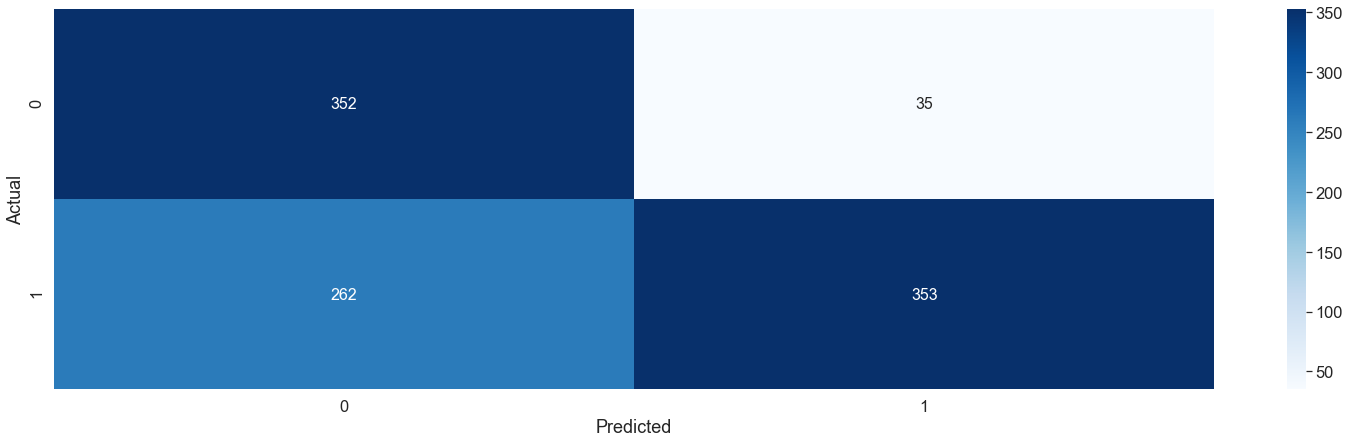

In [137]:
#we plot the confusion metrix of training set as follows
cm = confusion_matrix(np.array(y2), prediction)
df_cm = pd.DataFrame(cm, columns=np.unique(y2), index = np.unique(y2))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (26,7))
sns.set(font_scale=1.5)
sns.heatmap(df_cm, cmap="Blues", fmt = 'g',annot=True,annot_kws={"size": 16})

In [138]:
# from the above matrices, we can clearly see that our best model have extremely good precision score, but bad recall score.
# precision = TP/(TP+FP) and recall = TP/(TP+FN)
# It means our best model have large amount of FN than FP. It may because our dataset is imbalanced with true labels(1) > false labels(0)
# The model did not learn equal amount of knowledge for the 2 classes.
# Precision and recall can be combined into a single score that seeks to balance both concerns, which is called f1 score.
# f1 = 2*precision*recall/(precision+recall)
# It just shows the 'average' of recall and precision and f1 is very close to our accuracy here.

section b

I propose here 2 metrics. TPR (True Positive Rate) = TP / positives = Recall = TP / (TP+FN)
; FPR (False Positive Rate) = FP / negatives = FP / (FP+TN). They should be viewed in pairs. 
In our case here, we care about both TP and TN,(both are important) so we want our matrices to contain this piece of information
We have imbalanced datasets here(both election and generic tweets data). Because the model does not learn equal amount of knowledge in training phase for the 2 classes, it is likely that the model will have an unstable performance. By looking at TPR and FPR together, we can immediately know the performance of our model on classifying both true label and false labels. 

section c

In [139]:
len(bm_prediction)#same size as the election data

1002

In [140]:
parties = election_data.political_party
len(parties)

1002

In [141]:
election_label = election_data.label
len(election_label)

1002

In [142]:
# extract 3 columns that will be used in section c to form a new df
election_temp = pd.DataFrame({'party': parties, 'prediction': bm_prediction, 'label': election_label})

In [143]:
election_temp

,party,prediction,label
0,liberal,0,0
1,liberal,0,0
2,other,0,1
3,liberal,0,0
4,ppc,0,1
...,...,...,...
997,other,0,0
998,liberal,0,0
999,other,0,0
1000,conservative,0,0


In [144]:
election_temp = election_temp[election_temp['party'] != 'other'] # only need data of the four parties

In [145]:
election_temp

,party,prediction,label
0,liberal,0,0
1,liberal,0,0
3,liberal,0,0
4,ppc,0,1
5,conservative,0,0
...,...,...,...
993,conservative,0,0
995,liberal,0,0
998,liberal,0,0
1000,conservative,0,0


In [146]:
party_prediction = [] # we will put in how many predictions of 1 and 0 for each party respectively
party_label = [] # same as above but put in labels instead of our predictions

In [147]:
# we will put in how many predictions of 1 and 0 for each party.
party_prediction = election_temp.groupby(['party', 'prediction']).size().unstack(fill_value=0)
party_prediction

prediction,0,1
party,,
conservative,129,76
liberal,287,108
ndp,41,32
ppc,49,55


In [148]:
# same as above but put in labels instead of our predictions
party_label = election_temp.groupby(['party', 'label']).size().unstack(fill_value=0)
party_label

label,0,1
party,,
conservative,91,114
liberal,188,207
ndp,17,56
ppc,25,79


[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'party'),
 Text(0.5, 1.0, 'sentiment prediction')]

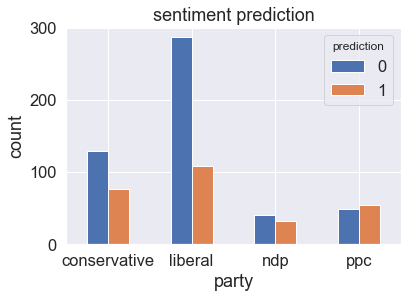

In [149]:
# sentiment prediction for the 4 parties
party_prediction.plot.bar(rot=0)
plt.gca().set(ylabel='count', xlabel = 'party', title = 'sentiment prediction')

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'label'),
 Text(0.5, 1.0, 'sentiment label')]

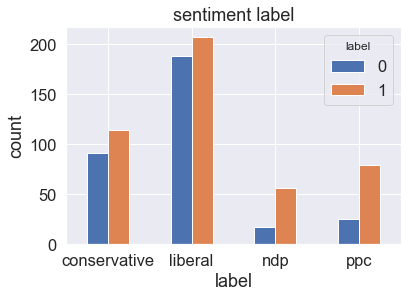

In [150]:
# true sentiment labele prediction for the 4 parties
party_label.plot.bar(rot=0)
plt.gca().set(ylabel='count', xlabel = 'label', title = 'sentiment label')

In [152]:
# get the percentage accuracy of the best model's predictions for each party 
def get_accuracy(party = 'liberal'):
    correct_0 = len(election_temp.loc[(election_temp['party'] == party)& (election_temp['prediction']== 0) & (election_temp['label'] == 0)]) 
    correct_1 = len(election_temp.loc[(election_temp['party'] == party)& (election_temp['prediction']== 1) & (election_temp['label'] == 1)])
    total = len(election_temp.loc[(election_temp['party'] == party)]) 
    return "{:.3f}".format((correct_0+correct_1)/total)

In [153]:
correct_temp = []# record the percentage accuracy for each party's prediction


In [154]:
for i in ['liberal', 'conservative', 'ndp', 'ppc']:
    correct_temp.append(get_accuracy(party = i))

In [155]:
correct_temp# prediction accuracy for each party

['0.689', '0.746', '0.644', '0.596']

In [156]:
correct_temp = list(map(float, correct_temp))# convert string accuracies to float numbers
correct_temp 

[0.689, 0.746, 0.644, 0.596]

[Text(0, 0.5, 'prediction accuracy'),
 Text(0.5, 0, 'party'),
 Text(0.5, 1.0, 'prediction accuracy for each party')]

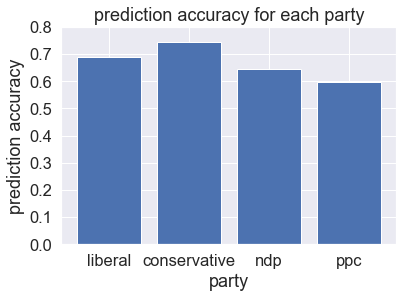

In [157]:
# bar plot of the accuracies for the 4 parties
plt.bar(['liberal','conservative','ndp','ppc'],correct_temp)
plt.yticks(np.linspace(0,0.8,9))
plt.gca().set(ylabel='prediction accuracy', xlabel = 'party', title = 'prediction accuracy for each party')

From the graphs above, I find that the best model tends to make a lot of FN mistakes. The imbalance nature of our dataset may hinder our model from learning more about the negative labels(0 class). But overall, the accuracy of sentiment prediction for the four parties are quite good(around 70% average accuracy). NLP based on tweets is quite useful for political parties because it can tell the parties how popular they are in the tweets discussion(how many tweets are about them),the proportion of positive and negative tweets. More importantly, they can compare with our parties to get a sense about their influences and the likelyhood to win the election. 
We can see from the sentiment label graph that most tweets are about the liberal party. This implies that the liberal party is the most popular party among the four. If we rank the popularity according to the number of tweets, we get 'liberal'>'conservative'>'ppc'>'ndp'. The Liberal and Conservative party has a larger proportion of negative tweets(around 40%) than ndp(around 20%) and ppc(around 30%), which implies that although the Liberal and Conservative party maybe more popular than ndp and ppc, the proportion of people that have low expectations of them is also high. In contrast, ndp and ppc are less popular, but people's opinions towards them are more positive, which implies that people have higher expectations of them. Among the four parties, the Liberal Party is the most popular party and the New Democrats Party got the highest expections from people.
Since our data are imbalanced, we can set the class_weight parameter to be 'balanced 'for the logistic regression to gain better accuracy. The 'balanced' mode uses the values of y to automatically adjust weights inversely proportional to class frequencies.
We can also do hyperparameter tuning and set different combinations of 'C' and penalties(L1,L2) to see the changes in classification accuracy.

part b)

In [158]:
election_data = pd.read_csv("election.csv")

In [159]:
election_data

,sentiment,negative_reason,cleaned_text,political_party,label
0,negative,calling election early,"canadian election power grab trudeau , yes -- ...",liberal,0
1,negative,covid,hope trudeau loses canadian election tomorrow ...,liberal,0
2,positive,NaN,"dear canadian , election test progressive . wh...",other,1
3,negative,calling election early,canadian friend : never forget trudeau year ma...,liberal,0
4,positive,NaN,sorry @ thejagmeetsingh voted # ndp life elect...,ppc,1
...,...,...,...,...,...
997,negative,others,absolutely horrible canada . forthcoming elect...,other,0
998,negative,gun control,@ davidakin trudeau imposes gun control policy...,liberal,0
999,negative,others,canada 🇨🇦 election stolen thug . uneducated go...,other,0
1000,negative,tell lies,"'toole amends platform gun control , question ...",conservative,0


In [160]:
# extract negative sentiment tweets ans their reasons.
election_neg = election_data[election_data['sentiment']=='negative'].loc[:,['negative_reason','cleaned_text']]
election_neg

,negative_reason,cleaned_text
0,calling election early,"canadian election power grab trudeau , yes -- ..."
1,covid,hope trudeau loses canadian election tomorrow ...
3,calling election early,canadian friend : never forget trudeau year ma...
5,covid,vaccine & gun key election 'toole serious plan...
6,others,"’ sorry , moderator respond leadership candida..."
...,...,...
997,others,absolutely horrible canada . forthcoming elect...
998,gun control,@ davidakin trudeau imposes gun control policy...
999,others,canada 🇨🇦 election stolen thug . uneducated go...
1000,tell lies,"'toole amends platform gun control , question ..."


In [161]:
election_data['negative_reason'].unique() # 11 reasons if ignoring NANs

array(['calling election early', 'covid ', nan, 'others', 'scandal',
       'tell lies', 'gun control', 'economy', 'healthcare and marijuana',
       'segregation', 'women reproductive right and racism',
       'climate problem'], dtype=object)

In [162]:
# we combine 'nan' and 'others' to be one reason because they all belong to 'unkown' class.
reason_to_label = {'calling election early':0, 'covid ':1, 'scandal':2, 'tell lies':3, 'gun control':4, 'economy':5, 
                   'healthcare and marijuana':6, 'segregation':7, 'women reproductive right and racism':8,
                   'climate problem' :9, np.nan:10, 'others': 10}

In [163]:
election_neg.replace({"negative_reason": reason_to_label},inplace=True)# map the string reasons to numbers

In [164]:
election_neg['negative_reason'].isna().sum()

0

In [165]:
election_neg

,negative_reason,cleaned_text
0,0,"canadian election power grab trudeau , yes -- ..."
1,1,hope trudeau loses canadian election tomorrow ...
3,0,canadian friend : never forget trudeau year ma...
5,1,vaccine & gun key election 'toole serious plan...
6,10,"’ sorry , moderator respond leadership candida..."
...,...,...
997,10,absolutely horrible canada . forthcoming elect...
998,4,@ davidakin trudeau imposes gun control policy...
999,10,canada 🇨🇦 election stolen thug . uneducated go...
1000,3,"'toole amends platform gun control , question ..."


In [166]:
X_neg = election_neg['cleaned_text']
y_neg = election_neg['negative_reason']

In [182]:
#train test split
X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(X_neg,y_neg,test_size=0.3)

In [183]:
bow_vectorizer = CountVectorizer()

In [184]:
# get training and test data using BOW
x_train_neg = bow_vectorizer.fit_transform(X_train_neg.values.astype('str')) 
x_test_neg = bow_vectorizer.transform(X_test_neg.values.astype('str')) 

In [185]:
x_train_neg

<270x1727 sparse matrix of type '<class 'numpy.int64'>'
	with 4198 stored elements in Compressed Sparse Row format>

In [186]:
x_test_neg

<117x1727 sparse matrix of type '<class 'numpy.int64'>'
	with 1349 stored elements in Compressed Sparse Row format>

In [187]:
# There is no ordinal(ranked) relationship between the labels. We should use one versus rest multiclass logistic regression. 
# We should use liblinear solver with it.
# set class_weight to balanced to let the model adjust the weight for each class for this imbalanced dataset automatically.
lm = LogisticRegression(multi_class='ovr', solver='liblinear',class_weight = 'balanced',n_jobs=-1)

In [189]:
# only liblinear and saga solver support both l1 and l2 penalty
param_grid={'C': [0.01,0.05,0.1,0.5,0.8,1,10,100,1000], 'penalty': ['l1', 'l2'], 'solver': ['liblinear','saga']}
grid_search = GridSearchCV(lm, param_grid, cv=10, return_train_score=True,n_jobs=-1)
grid_search.fit(x_train_neg, y_train_neg.values.ravel())

GridSearchCV(cv=8,
             estimator=LogisticRegression(class_weight='balanced',
                                          multi_class='ovr', n_jobs=-1,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 0.8, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             return_train_score=True)

In [190]:
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_

In [191]:
best_parameters

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [192]:
best_model

LogisticRegression(C=0.1, class_weight='balanced', multi_class='ovr', n_jobs=-1,
                   solver='liblinear')

In [193]:
# use the best model to predict the test set
prediction = best_model.predict(x_test_neg)

In [194]:
prediction

array([ 5,  0, 10,  0,  0,  4, 10, 10, 10, 10,  3,  0,  5,  4,  0, 10,  3,
       10, 10,  0,  0,  0,  0, 10, 10, 10,  2,  0,  5,  0, 10,  0,  9,  0,
       10,  0, 10,  4,  0,  0, 10, 10, 10,  0,  3, 10,  0, 10,  0, 10,  9,
        4, 10,  0, 10, 10, 10, 10,  3,  0, 10,  3,  4, 10, 10, 10, 10,  3,
       10,  3,  0, 10,  9,  0, 10, 10,  4,  0,  0,  2,  4, 10,  0, 10, 10,
       10, 10,  0, 10,  4,  0,  4, 10,  0,  0, 10, 10, 10,  0,  0, 10, 10,
       10, 10,  3, 10,  0,  0, 10,  0,  0,  9,  0,  6,  0,  5,  0],
      dtype=int64)

In [195]:
y_test_neg.ravel()

array([ 3, 10,  3,  0,  1,  2,  3, 10, 10,  3,  5, 10,  5,  4, 10,  3,  4,
        3,  3,  0,  3, 10,  0, 10,  7, 10, 10,  3,  5,  0, 10,  0,  9,  0,
        3,  3, 10,  4, 10,  0,  2, 10,  6,  0, 10,  2,  1, 10,  0, 10, 10,
        3, 10,  1, 10, 10, 10,  1,  3,  0, 10, 10, 10, 10,  3,  6, 10,  3,
       10,  1,  0, 10, 10,  0, 10,  2,  4, 10,  0,  3, 10, 10,  0, 10, 10,
       10, 10,  0, 10,  2,  1,  1, 10,  0,  0, 10, 10,  3,  0,  0, 10,  3,
       10,  3, 10, 10,  6,  0, 10, 10, 10,  3,  0,  6,  0,  5,  0],
      dtype=int64)

In [196]:
f1_score(y_test_neg.ravel(),prediction,average='weighted')

0.49670727869948006

In [197]:
accuracy_score(y_test_neg.ravel(),prediction)

0.5555555555555556

In [198]:
y_train_neg.value_counts(sort=False) #value count for each label class in the training set

0      50
1      18
2       9
3      41
4      12
5      16
6       3
7       2
8       4
9      14
10    101
Name: negative_reason, dtype: int64

We acheived around 50% accuracy in preicting the reasons for the negative sentiments.
One issue with this relatively low accuracy is that the training samples size is small(only 270). Hence our bag of words size is small. If we get small sample size and small feature size(compared to gerneric tweets data we used in part a), it is not likely that our model will do well on the test set. 
Also, we are doing a multiclass classification here, we need our data to be somewhat balanced so that our model can learn to predict with comparable knowledge for each class. But according to the value count for each label class, we get very imbalanced value counts. We have over 100 instances of class 10 but we only have less than 10 instances for each of class 6,7,and 8. As a result, our algorithm does not learn equal amount of knowledge for each class and it has bad performance for predicting the minority classes.

One way to inprove the accuracy is to combine the label classes/reasons further. For example, we can combine minority classes together to form new classes of larger size(reduce number of classes) so that our model can have comparable knowledge for each class to make better predictions. Specifically we can combine 'healthcare and marijuana' with 'covid' because I think they all belongs to the domain of health care.
Also, we can definitely use more hyperparameters for tuning, such as using more solvers(‘newton-cg’) or penalties like 'elasticnet' (combination of ridge and lasso) or C values.

part c)

In [213]:
election_pos = election_data[election_data['sentiment'] == 'positive']['cleaned_text']

In [214]:
election_pos

2      dear canadian , election test progressive . wh...
4      sorry @ thejagmeetsingh voted # ndp life elect...
8      canadian # voteppc support @ maximebernier wou...
9      justin trudeau literally rock thrown yet conti...
12     # throwbackthursday federal election debate ni...
                             ...                        
938    election canadian freedom ! ! ! without freedo...
940    progressive conservative government unfortunat...
943    last one night ! lookin like ndp need rally be...
969    # justintrudeau killing ! ' hate # otoole righ...
984    @ justintrudeau justin , rifle ’ hurt people ....
Name: cleaned_text, Length: 615, dtype: object

In [215]:
election_neg = election_data[election_data['sentiment'] == 'negative']['cleaned_text']

In [216]:
election_neg

0       canadian election power grab trudeau , yes -- ...
1       hope trudeau loses canadian election tomorrow ...
3       canadian friend : never forget trudeau year ma...
5       vaccine & gun key election 'toole serious plan...
6       ’ sorry , moderator respond leadership candida...
                              ...                        
997     absolutely horrible canada . forthcoming elect...
998     @ davidakin trudeau imposes gun control policy...
999     canada 🇨🇦 election stolen thug . uneducated go...
1000    'toole amends platform gun control , question ...
1001    @ justintrudeau stop lie , stop manipulation ,...
Name: cleaned_text, Length: 387, dtype: object

In [223]:
bow_vectorizer = CountVectorizer()# initialize vectorizers
bow_vectorizer2 = CountVectorizer()

In [224]:
bow_pos = bow_vectorizer.fit_transform(election_pos.values.astype('str')) # create bag of words for positive tweets

In [225]:
df_pos=pd.DataFrame(bow_pos.toarray(),columns=bow_vectorizer.get_feature_names())# convert matrix to dataframe

In [226]:
bow_neg = bow_vectorizer2.fit_transform(election_neg.values.astype('str')) # create bag of words for negative tweets

In [227]:
df_neg=pd.DataFrame(bow_neg.toarray(),columns=bow_vectorizer2.get_feature_names())# convert matrix to dataframe

In [228]:
df_pos

,a_bbound,abacusdataca,abandoned,abc,ability,able,abpoli,abroad,absolutely,absurd,...,ymm,young,youth,youthvote,youtube,yvonneyyz,yyc,zazzle,zero,لنصوت_جميعا
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
612,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [229]:
df_neg

,aa,ab,abandoning,abc,abhorrent,ability,ablais_,able,abled,ableg,...,yelled,yes,yesterday,yet,you,younger,youtube,yup,zealot,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
383,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
384,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
freq_pos = [] # record the frequency of each word for both positive and negative labels
freq_neg = []

In [237]:
columns_pos = df_pos.columns# record the positive tweets' column names for reference

In [238]:
columns_pos

Index(['a_bbound', 'abacusdataca', 'abandoned', 'abc', 'ability', 'able',
       'abpoli', 'abroad', 'absolutely', 'absurd',
       ...
       'ymm', 'young', 'youth', 'youthvote', 'youtube', 'yvonneyyz', 'yyc',
       'zazzle', 'zero', 'لنصوت_جميعا'],
      dtype='object', length=2580)

In [239]:
columns_neg = df_neg.columns# record the negative tweets' column names for reference

In [240]:
columns_neg

Index(['aa', 'ab', 'abandoning', 'abc', 'abhorrent', 'ability', 'ablais_',
       'able', 'abled', 'ableg',
       ...
       'yelled', 'yes', 'yesterday', 'yet', 'you', 'younger', 'youtube', 'yup',
       'zealot', 'zero'],
      dtype='object', length=2227)

In [232]:
# get the count for each word in the positive election tweets
freq_pos = df_pos.sum(axis = 0).values

In [233]:
# get the count for each word in the negative election tweets
freq_neg = df_neg.sum(axis = 0).values

In [235]:
len(freq_pos)

2580

In [241]:
len(freq_neg)

2227

In [244]:
ind_pos = np.argpartition(freq_pos, -50)[-50:]#get the top 50 frequent words' indexes for positive election tweets
freq_pos[ind_pos]#top 50 frequencies for positive election tweets

array([ 25,  26,  26,  27,  27,  28,  31,  30,  29,  32,  35,  33,  35,
        33,  35,  62,  50,  43,  63,  46,  50,  54,  38,  41,  44,  45,
        40,  39,  36,  36,  39,  36,  45,  53,  40,  42,  59,  48,  59,
        43,  40,  72, 124,  74,  87, 138, 200, 178, 315, 409], dtype=int64)

In [245]:
ind_neg = np.argpartition(freq_neg, -50)[-50:]#get the top 50 frequent words' indexes for negative election tweets
freq_neg[ind_neg]#top 50 frequencies for negative election tweets

array([ 16,  17,  17,  19,  18,  19,  19,  22,  18,  22,  17,  24,  21,
        20,  18,  21,  19,  23,  20,  18,  17,  20,  23,  21,  23,  24,
        45,  48,  28,  30,  33,  26, 271,  32,  42,  47,  24,  51,  32,
        37,  29,  29,  78,  36, 159,  88,  30, 210,  26,  30], dtype=int64)

In [246]:
#top 50 words for positive election tweets
columns_pos[ind_pos]

Index(['government', 'choice', 'care', 'debate', 'please', 'cpc', 'toole',
       'voted', 'voteliberal', 'think', 'love', 'one', 'let', 'make', 'justin',
       'liberal', 'cdnpoli', 'right', 'get', 'want', 'day', 'like', 'better',
       'erinotoole', 'best', 'leader', 'support', 'would', 'voting', 'great',
       'voteppc', 'hope', 'need', 'freedom', 'ndp', 'people', 'federal', 'ppc',
       'conservative', 'justintrudeau', 'time', 'win', 'otoole', 'good',
       'party', 'canada', 'vote', 'trudeau', 'canadian', 'election'],
      dtype='object')

In [247]:
#top 50 words for negative election tweets
columns_neg[ind_neg]

Index(['way', 'right', 'bad', 'many', 'time', 'good', 'con', 'million',
       'going', 'call', 'unnecessary', 'leader', 'calling', 'erin', 'lie',
       'win', 'know', 'never', 'day', 'government', 'covid', 'country',
       'justin', 'would', 'think', 'one', 'like', 'vote', 'erinotoole', 'want',
       'liberal', 'people', 'election', 'party', 'conservative',
       'justintrudeau', 'get', 'pandemic', 'year', 'toole', 'say', 'called',
       'canada', 'cdnpoli', 'trudeau', 'otoole', 'nevervoteconservative',
       'canadian', 'care', 'gun'],
      dtype='object')

In [274]:
df_pos = pd.DataFrame(list(zip(columns_pos[ind_pos],freq_pos[ind_pos])), columns =['word','freq'] )

In [275]:
df_pos.head()

,word,freq
0,government,25
1,choice,26
2,care,26
3,debate,27
4,please,27


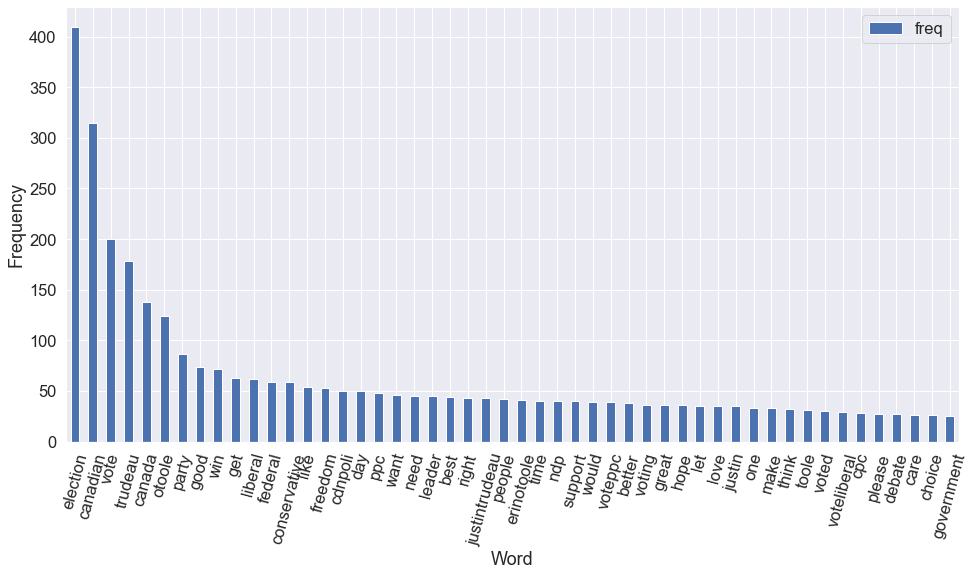

In [288]:
# bar plot of the top 50 frequent words in positive election tweets
df_pos.sort_values(['freq'], ascending=False,inplace = True)
df_pos.plot.bar(x='word', y='freq',figsize=(16,8))

plt.xticks(rotation=75)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

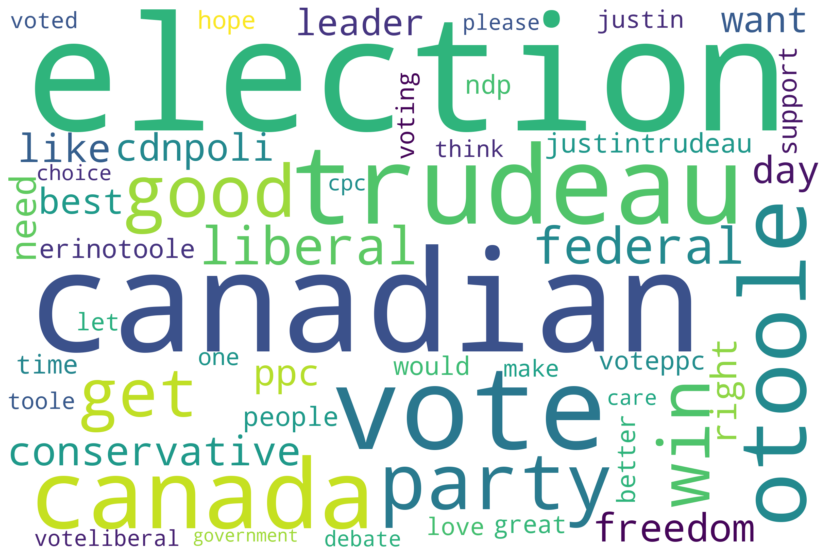

In [301]:
#A word cloud is generated. The size of the word corresponds to the frequency in the positive election tweets.
d = {}
for a, x in df_pos.values:
    d[a] = x

wordcloud = WordCloud(background_color = "white",width = 2400, height = 1600)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [302]:
df_neg = pd.DataFrame(list(zip(columns_neg[ind_neg],freq_neg[ind_neg])), columns =['word','freq'] )

In [303]:
df_neg.head()

,word,freq
0,way,16
1,right,17
2,bad,17
3,many,19
4,time,18


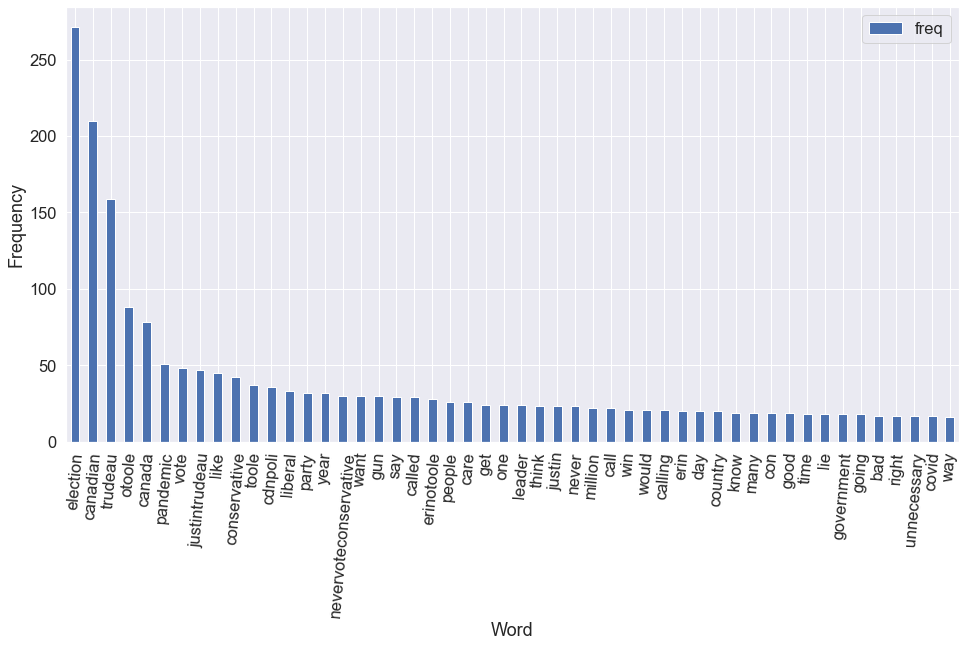

In [304]:
# bar plot of the top 50 frequent words in negative election tweets
df_neg.sort_values(['freq'], ascending=False,inplace = True)
df_neg.plot.bar(x='word', y='freq',figsize=(16,8))

plt.xticks(rotation=85)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

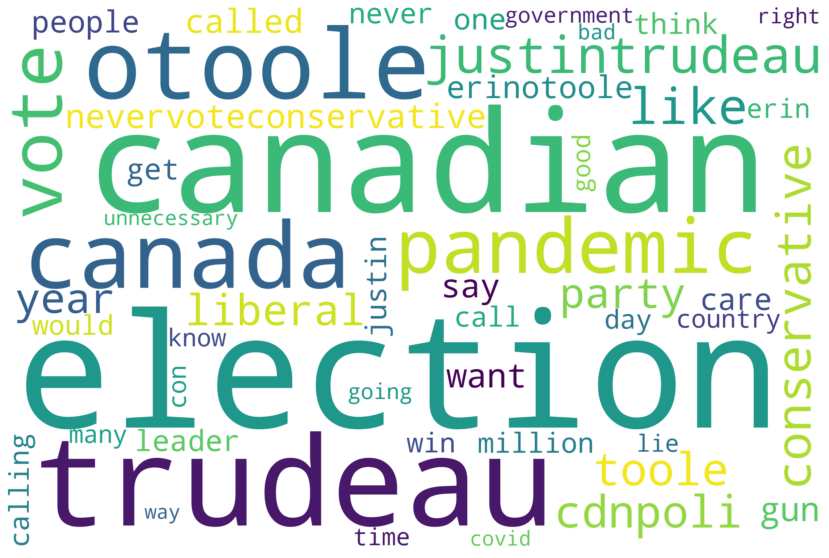

In [305]:
#A word cloud is generated. The size of the word corresponds to the frequency in the negative election tweets.
d = {}
for a, x in df_neg.values:
    d[a] = x

wordcloud = WordCloud(background_color = "white",width = 2400, height = 1600)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

From the 2 word clouds and the 2 bar plots for positive and negative tweets, I have the following findings.
The Liberal Party leader Justin Trudeau and the Conservative Party leader Erin O'Toole are the main focus of both types of tweets. The leaders of the other 2 parties(ppc and ndp) are not contained in the top 50 key words for both types of tweets. This implies that the main competition of the 2021 election is between the Liberal Party and the Conservative Party. 
From another aspect, we can also see that the keywords ppc and ndp only appear in the top 50 words for positive tweets but not the negative ones. This implies that although they are less popular than the Liberal and Conservative Party, People have higher expectations on them. They have many more positive evaluations than the negative ones.
Unlike ndp and ppc, The Liberal and Conservative parties have similar/comparable amount of positive and negative tweets so they have both large amount of supporters and opponents
We can also see the main reasons of positive tweets are freedom and rights(some words are in singular form because we used a stemmer from nltk). And the main reasons of negative tweets are gun regulations problem and the unsatisfactory countermeasures against COVID. 